## Binary Classification Feature Importances

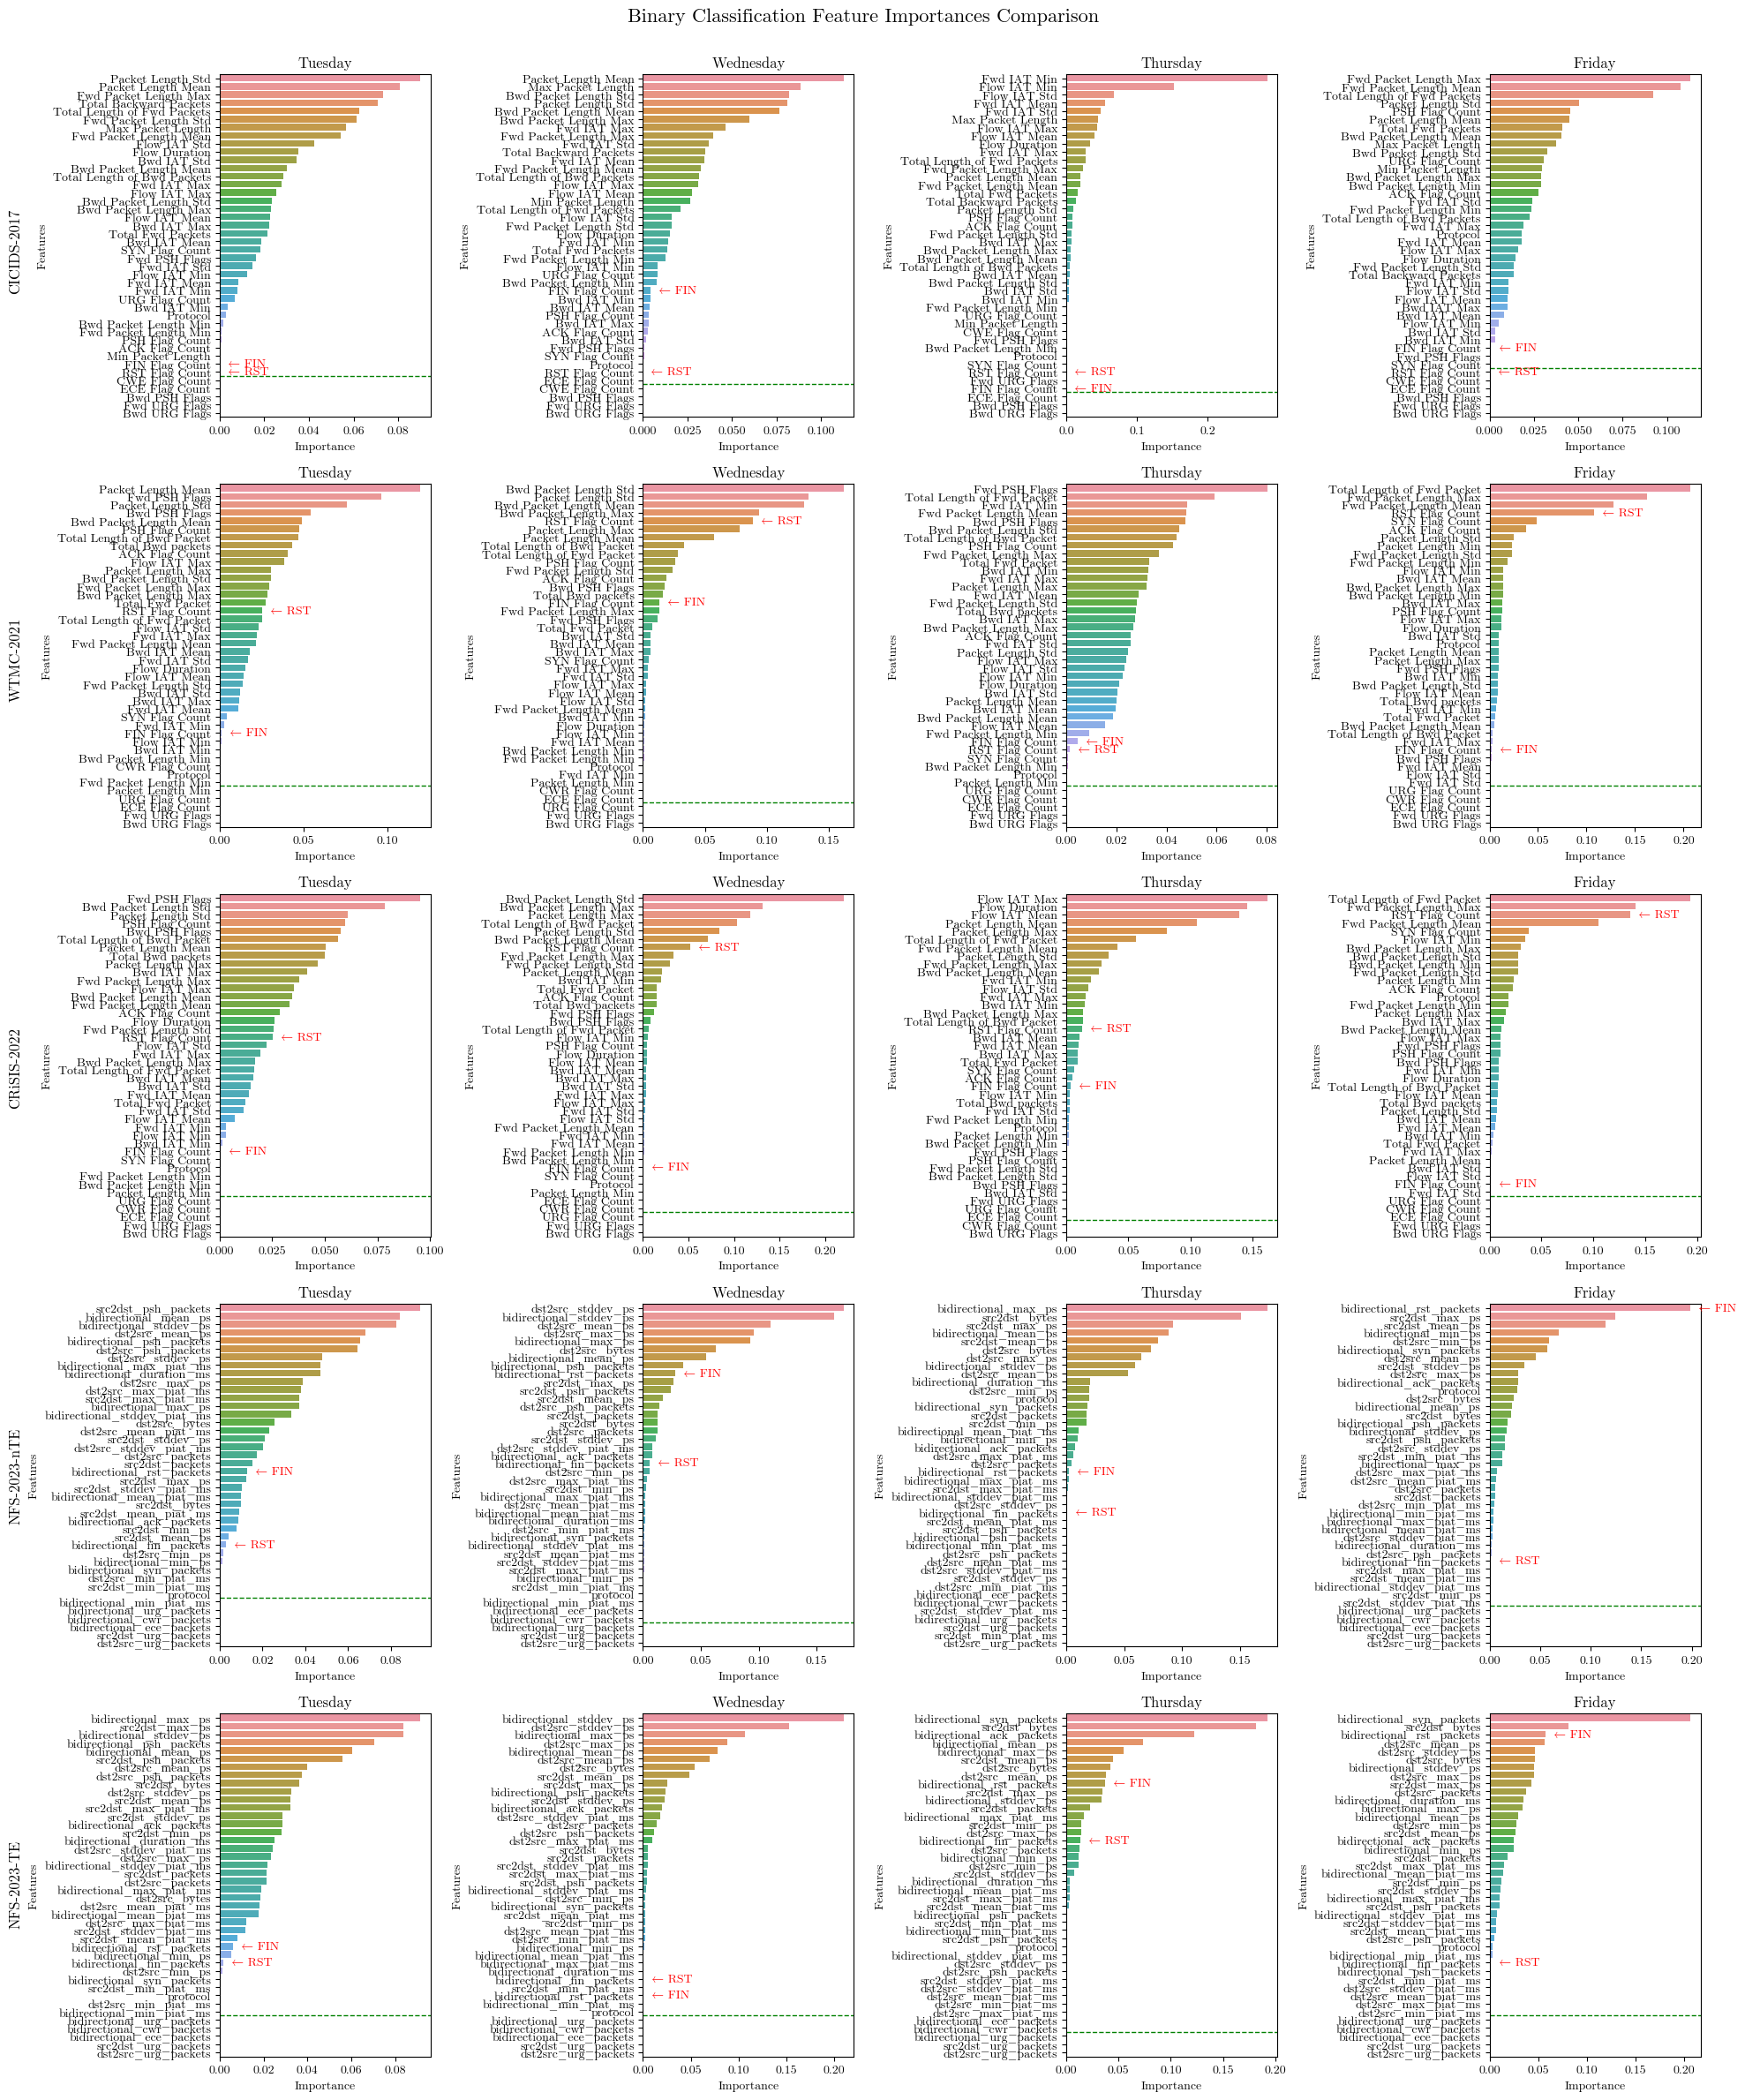

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import os

# Ensure the directory exists
output_directory = 'fig'
os.makedirs(output_directory, exist_ok=True)

# Set font to CMU Serif if available
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['CMU Serif']

# File paths
file_paths = [
    '../1-CICIDS-2017/datasets/no_feat_sel/binary-class/feature_importances.json',
    '../2-WTMC-2021/datasets/no_feat_sel/binary-class/feature_importances.json',
    '../3-CRiSIS-2022/datasets/no_feat_sel/binary-class/feature_importances.json',
    '../4-NFS-2023/NFS-2023-nTE/no_feat_sel/binary-class/feature_importances.json',
    '../4-NFS-2023/NFS-2023-TE/no_feat_sel/binary-class/feature_importances.json'
]

# Define features to emphasize
emphasize_features = ["FIN Flag Count", "RST Flag Count", "bidirectional_rst_packets", "bidirectional_fin_packets"]

# Feature mapping
feature_mapping = {
    "FIN Flag Count": "FIN",
    "RST Flag Count": "RST",
    "bidirectional_rst_packets": "FIN",
    "bidirectional_fin_packets": "RST"
}

# Row labels corresponding to each dataset
row_labels = ["CICIDS-2017", "WTMC-2021", "CRiSIS-2022", "NFS-2023-nTE", "NFS-2023-TE"]

# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the size as needed

# Iterate over each file and each day
for row, file_path in enumerate(file_paths):
    with open(file_path, 'r') as file:
        data = json.load(file)

    for col, (day, features) in enumerate(data.items()):
        df = pd.DataFrame(features.items(), columns=['Feature', 'Importance'])
        ax = axes[row, col]

        # Plot
        sns.barplot(data=df, y='Feature', x='Importance', ax=ax)
        ax.set_title(day)
        ax.set_xlabel('Importance')
        ax.set_ylabel('Features')

        # Annotations and Line
        for original_feature, mapped_feature in feature_mapping.items():
            if original_feature in df['Feature'].values:
                y = df.index[df['Feature'] == original_feature].tolist()[0]
                ax.text(df.loc[y, 'Importance'], y, '  ← ' + mapped_feature, verticalalignment='center', color='red')

        zero_importance_features = df[df['Importance'] == 0]
        if not zero_importance_features.empty:
            line_position = df.index[df['Feature'].isin(zero_importance_features['Feature'])].min() - 0.5
            ax.axhline(y=line_position, color='green', linestyle='--', linewidth=1)

# Manually adjusted positions for each row label
label_positions = [0.87, 0.685, 0.5, 0.315, 0.13]
            
# Add row labels
for i, label in enumerate(row_labels):
    fig.text(0.02, label_positions[i], label, ha='center', va='center', rotation='vertical', fontsize=12)
    
fig.suptitle("Binary Classification Feature Importances Comparison", fontsize=16)    
plt.tight_layout(rect=[0.02, 0.03, 1, 0.97])
plt.subplots_adjust(top=0.95)  # Adjust the top parameter to accommodate the main title
plt.savefig(os.path.join(output_directory, 'binary-feature-importance.png'))
plt.show()

## Multi-class Classification Feature Importances

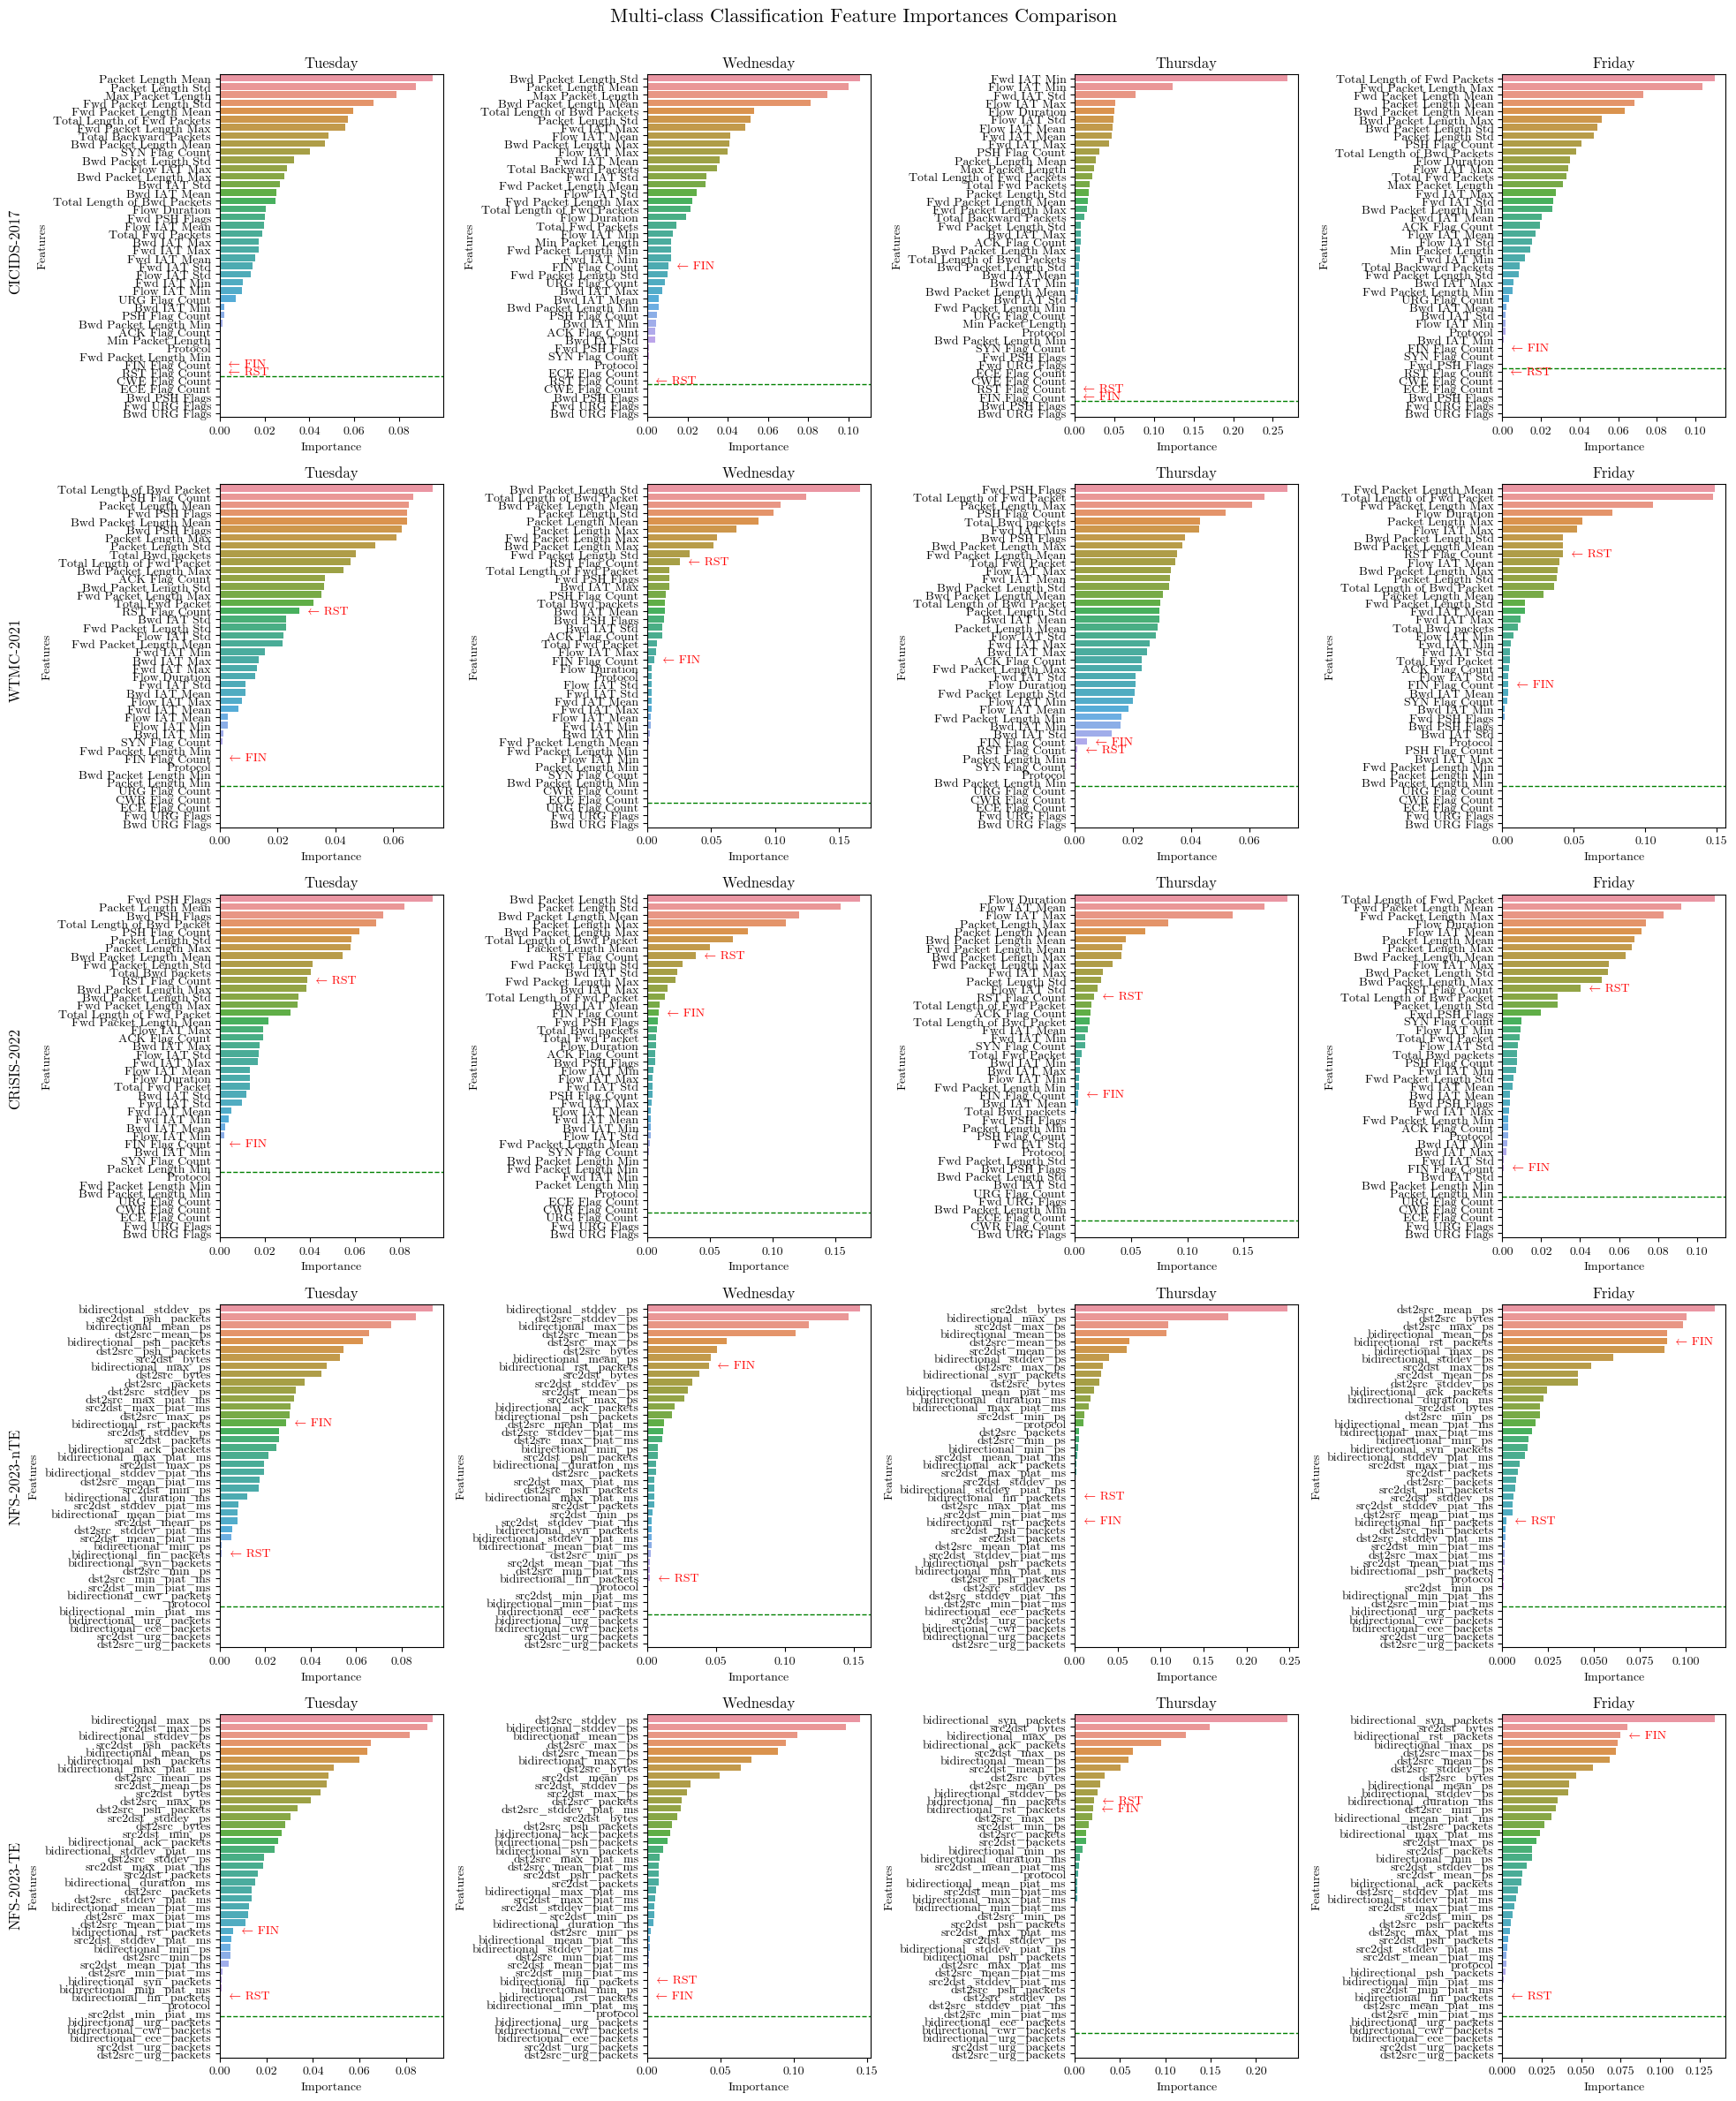

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import os

# Ensure the directory exists
output_directory = 'fig'
os.makedirs(output_directory, exist_ok=True)

# Set font to CMU Serif if available
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['CMU Serif']

# File paths
file_paths = [
    '../1-CICIDS-2017/datasets/no_feat_sel/multi-class/feature_importances.json',
    '../2-WTMC-2021/datasets/no_feat_sel/multi-class/feature_importances.json',
    '../3-CRiSIS-2022/datasets/no_feat_sel/multi-class/feature_importances.json',
    '../4-NFS-2023/NFS-2023-nTE/no_feat_sel/multi-class/feature_importances.json',
    '../4-NFS-2023/NFS-2023-TE/no_feat_sel/multi-class/feature_importances.json'
]

# Define features to emphasize
emphasize_features = ["FIN Flag Count", "RST Flag Count", "bidirectional_rst_packets", "bidirectional_fin_packets"]

# Feature mapping
feature_mapping = {
    "FIN Flag Count": "FIN",
    "RST Flag Count": "RST",
    "bidirectional_rst_packets": "FIN",
    "bidirectional_fin_packets": "RST"
}

# Row labels corresponding to each dataset
row_labels = ["CICIDS-2017", "WTMC-2021", "CRiSIS-2022", "NFS-2023-nTE", "NFS-2023-TE"]

# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the size as needed

# Iterate over each file and each day
for row, file_path in enumerate(file_paths):
    with open(file_path, 'r') as file:
        data = json.load(file)

    for col, (day, features) in enumerate(data.items()):
        df = pd.DataFrame(features.items(), columns=['Feature', 'Importance'])
        ax = axes[row, col]

        # Plot
        sns.barplot(data=df, y='Feature', x='Importance', ax=ax)
        ax.set_title(day)
        ax.set_xlabel('Importance')
        ax.set_ylabel('Features')

        # Annotations and Line
        for original_feature, mapped_feature in feature_mapping.items():
            if original_feature in df['Feature'].values:
                y = df.index[df['Feature'] == original_feature].tolist()[0]
                ax.text(df.loc[y, 'Importance'], y, '  ← ' + mapped_feature, verticalalignment='center', color='red')

        zero_importance_features = df[df['Importance'] == 0]
        if not zero_importance_features.empty:
            line_position = df.index[df['Feature'].isin(zero_importance_features['Feature'])].min() - 0.5
            ax.axhline(y=line_position, color='green', linestyle='--', linewidth=1)

# Manually adjusted positions for each row label
label_positions = [0.87, 0.685, 0.5, 0.315, 0.13]
            
# Add row labels
for i, label in enumerate(row_labels):
    fig.text(0.02, label_positions[i], label, ha='center', va='center', rotation='vertical', fontsize=12)        

fig.suptitle("Multi-class Classification Feature Importances Comparison", fontsize=16)    
plt.tight_layout(rect=[0.02, 0.03, 1, 0.97])
plt.subplots_adjust(top=0.95)  # Adjust the top parameter to accommodate the main title
plt.savefig(os.path.join(output_directory, 'multi-feature-importance.png'))
plt.show()